In [176]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import ensemble
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
lencoder = LabelEncoder()
randomForest = ensemble.RandomForestRegressor()

In [137]:
training_raw = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
test_raw = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")

In [138]:
training_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
pd.set_option('display.max_columns', 100)
training_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
training_raw.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc066faa990>,
      dtype=object)

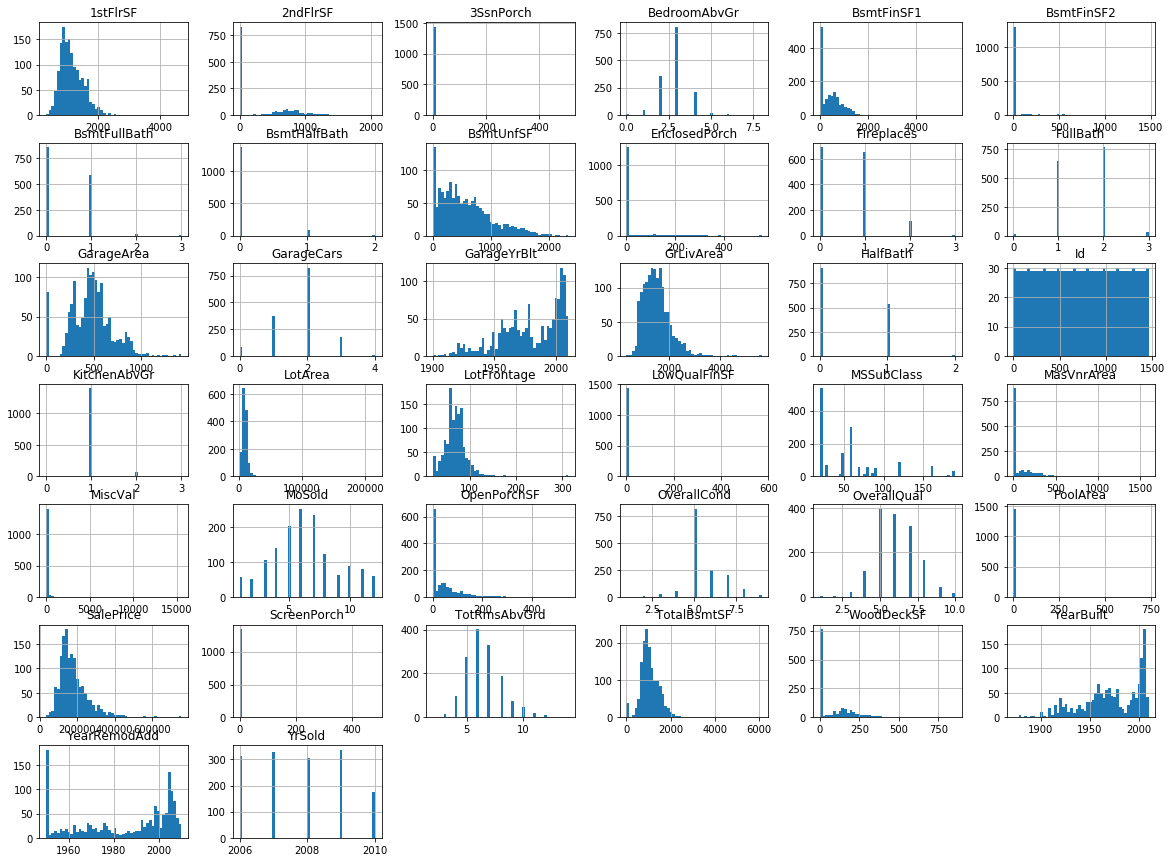

In [8]:
training_raw.hist(bins=50, figsize=(20,15))

In [140]:
training_raw.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [10]:
from copy import deepcopy
deepcopy?

Signature: deepcopy(x, memo=None, _nil=[])
Docstring:
Deep copy operation on arbitrary Python objects.

See the module's __doc__ string for more info.
File:      ~/opt/anaconda3/lib/python3.7/copy.py
Type:      function


In [141]:
training = deepcopy(training_raw)
training['Pool'] = [0 if x==0 else 1 for x in training['PoolArea']]
training = training.drop(['PoolArea','PoolQC'],axis=1)

In [142]:
training[['Alley']] = training[['Alley']].fillna('None')
training[['FireplaceQu']] = training[['FireplaceQu']].fillna('None')
training[['Fence']] = training[['Fence']].fillna('None')
training[['MiscFeature']] = training[['MiscFeature']].fillna('None')
training[['MasVnrType']] = training[['MasVnrType']].fillna('None')
training[['MasVnrArea']] = training[['MasVnrType']].fillna(0)

In [143]:
x = training.LotFrontage.mode()
training[['LotFrontage']] = training[['LotFrontage']].fillna(x)

In [144]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [47]:
training_2010 = training[training.YrSold==2010]
training_pre2010 = training[training.YrSold!=2010]

In [53]:
training_pre2010_target = training_2010.SalePrice
training_pre2010_features = training_pre2010.drop(['Id','SalePrice'],axis=1)

In [54]:
training_pre2010_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pool
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,0,9,2008,WD,Normal,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,NaN,NaN,0,12,2008,WD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,NaN,NaN,0,5,2006,WD,Normal,0
1453,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,NaN,NaN,0,7,2006,WD,Abnorml,0
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,NaN,NaN,0,10,2009,WD,Normal,0
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,NaN,NaN,0,8,2007,WD,Normal,0


In [14]:
training['3SsnPorch'].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304])

In [15]:
training['EnclosedPorch'].unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 115, 291, 116, 158, 210,  36, 200,  84, 148, 136,
       240,  54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98,
       143,  70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194,
       318,  48,  94, 138, 226, 174,  19, 170, 220, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99])

In [17]:
training_raw.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

## Random Forest

In [ ]:
randomForest = ensemble.RandomForestRegressor()

In [202]:
MSSubClass      =lencoder.fit_transform(training.MSSubClass).reshape((-1,1))
MSZoning      =lencoder.fit_transform(training.MSZoning).reshape((-1,1))
Street      =lencoder.fit_transform(training.Street).reshape((-1,1))
Alley      =lencoder.fit_transform(training.Alley).reshape((-1,1))
LotShape      =lencoder.fit_transform(training.LotShape).reshape((-1,1))
LandContour      =lencoder.fit_transform(training.LandContour).reshape((-1,1))
Utilities      =lencoder.fit_transform(training.Utilities).reshape((-1,1))
LotConfig      =lencoder.fit_transform(training.LotConfig).reshape((-1,1))
LandSlope    =lencoder.fit_transform(training.LandSlope).reshape((-1,1))
Neighborhood      =lencoder.fit_transform(training.Neighborhood).reshape((-1,1))
Condition1      =lencoder.fit_transform(training.Condition1).reshape((-1,1))
Condition2      =lencoder.fit_transform(training.Condition2).reshape((-1,1))
BldgType    =lencoder.fit_transform(training.BldgType).reshape((-1,1))
HouseStyle    =lencoder.fit_transform(training.HouseStyle).reshape((-1,1))
RoofStyle      =lencoder.fit_transform(training.RoofStyle).reshape((-1,1))
RoofMatl    =lencoder.fit_transform(training.RoofMatl).reshape((-1,1))
Exterior1st    =lencoder.fit_transform(training.Exterior1st).reshape((-1,1))
Exterior2nd    =lencoder.fit_transform(training.Exterior2nd).reshape((-1,1))
MasVnrType    =lencoder.fit_transform(training.MasVnrType).reshape((-1,1))
ExterQual    =lencoder.fit_transform(training.ExterQual).reshape((-1,1))
ExterCond    =lencoder.fit_transform(training.ExterCond).reshape((-1,1))
Foundation    =lencoder.fit_transform(training.Foundation).reshape((-1,1))
Heating    =lencoder.fit_transform(training.Heating).reshape((-1,1))
HeatingQC   =lencoder.fit_transform(training.HeatingQC).reshape((-1,1))
CentralAir    =lencoder.fit_transform(training.CentralAir).reshape((-1,1))
Functional    =lencoder.fit_transform(training.Functional).reshape((-1,1))
FireplaceQu    =lencoder.fit_transform(training.FireplaceQu).reshape((-1,1))
PavedDrive    =lencoder.fit_transform(training.PavedDrive).reshape((-1,1))
SaleType    =lencoder.fit_transform(training.SaleType).reshape((-1,1))
SaleCondition    =lencoder.fit_transform(training.SaleCondition).reshape((-1,1))
Pool    =lencoder.fit_transform(training.Pool).reshape((-1,1))
Fence   =lencoder.fit_transform(training.Fence).reshape((-1,1))

# LotFrontage = training.LotFrontage.values.reshape((-1,1))
LotArea = training.LotArea.values.reshape((-1,1))
YearBuilt = training.YearBuilt.values.reshape((-1,1))
YearRemodAdd = training.YearRemodAdd.values.reshape((-1,1))
OverallQual    =training.OverallQual.values.reshape((-1,1))
OverallCond = training.OverallCond.values.reshape((-1,1))
MasVnrArea    =training.MasVnrArea.values.reshape((-1,1))
BsmtFinSF1=training.BsmtFinSF1.values.reshape((-1,1))
BsmtFinSF2=training.BsmtFinSF2.values.reshape((-1,1))
BsmtUnfSF=training.BsmtUnfSF.values.reshape((-1,1))
TotalBsmtSF=training.TotalBsmtSF.values.reshape((-1,1))
FstFlrSF=training['1stFlrSF'].values.reshape((-1,1))
SndFlrSF=training['2ndFlrSF'].values.reshape((-1,1))
LowQualFinSF=training.LowQualFinSF.values.reshape((-1,1))
GrLivArea=training.GrLivArea.values.reshape((-1,1))
BsmtFullBath=training.BsmtFullBath.values.reshape((-1,1))
BsmtHalfBath=training.BsmtHalfBath.values.reshape((-1,1))
FullBath=training.FullBath.values.reshape((-1,1))
HalfBath=training.HalfBath.values.reshape((-1,1))
BedroomAbvGr=training.BedroomAbvGr.values.reshape((-1,1))
KitchenAbvGr=training.KitchenAbvGr.values.reshape((-1,1))
TotRmsAbvGrd=training.TotRmsAbvGrd.values.reshape((-1,1))
Fireplaces=training.Fireplaces.values.reshape((-1,1))
GarageCars=training.GarageCars.values.reshape((-1,1))
GarageArea=training.GarageArea.values.reshape((-1,1))
YrSold=training.YrSold.values.reshape((-1,1))
MoSold=training.MoSold.values.reshape((-1,1))
WoodDeckSF=training.WoodDeckSF.values.reshape((-1,1))
OpenPorchSF=training.OpenPorchSF.values.reshape((-1,1))
EnclosedPorch=training.EnclosedPorch.values.reshape((-1,1))
TSsnPorch=training['3SsnPorch'].values.reshape((-1,1))
ScreenPorch=training.ScreenPorch.values.reshape((-1,1))
MiscVal=training.MiscVal.values.reshape((-1,1))

In [85]:
training.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [207]:
training_target = training.SalePrice
training_features = np.concatenate((MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,
                                    Neighborhood,Condition1,Condition2,BldgType,LotArea,HouseStyle,OverallQual,OverallCond,
                                    YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,
                                    ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,
                                    BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,
                                    MoSold,YrSold,SaleType,SaleCondition,Pool,WoodDeckSF,OpenPorchSF,EnclosedPorch,TSsnPorch,ScreenPorch,Fence,MiscVal),axis=1)
columnNames  = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                    'Neighborhood','Condition1','Condition2','BldgType','LotArea','HouseStyle','OverallQual','OverallCond',
                                    'YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond',
                                    'Foundation','TotalBsmtSF','Heating','HeatingQC','CentralAir',
                                    'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Functional','Fireplaces',
                                    'GarageCars','GarageArea','PavedDrive','MoSold','YrSold','SaleType','SaleCondition','Pool',
                                    'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence','MiscVal']
training_features = pd.DataFrame(training_features, columns = columnNames)
X_train, X_test, y_train, y_test = train_test_split(training_features, training_target, test_size=0.2, random_state=0)

In [208]:
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [209]:
train_error = 1 - randomForest.score(X_train, y_train)
test_error  = 1 - randomForest.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.02101
The test     error is: 0.14797


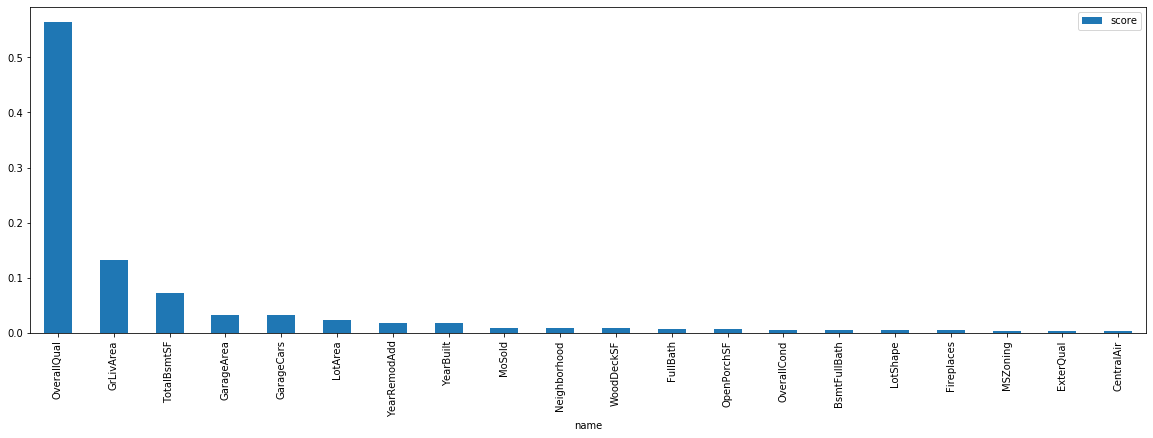

In [210]:
feature_sort = sorted(zip(training_features.columns, randomForest.feature_importances_), key=lambda t:t[1], reverse=True)
dtype = [('feature', 'S20'), ('importance', 'float')]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:20].plot.bar(x='name', y='score',figsize=(20,6))

In [211]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}